<a href="https://colab.research.google.com/github/Axeloooo/pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow

In [13]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [14]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

## 1. Data (Preparing and Loading)

Data can be almost anyhting in machine learning
* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical represenattion
2. Build a model to learn patterns in that numerial representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [15]:
# Create *known* parameters
weight = 7.0
bias = 3.0

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[3.0000],
         [3.1400],
         [3.2800],
         [3.4200],
         [3.5600],
         [3.7000],
         [3.8400],
         [3.9800],
         [4.1200],
         [4.2600]]))

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [16]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [17]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})


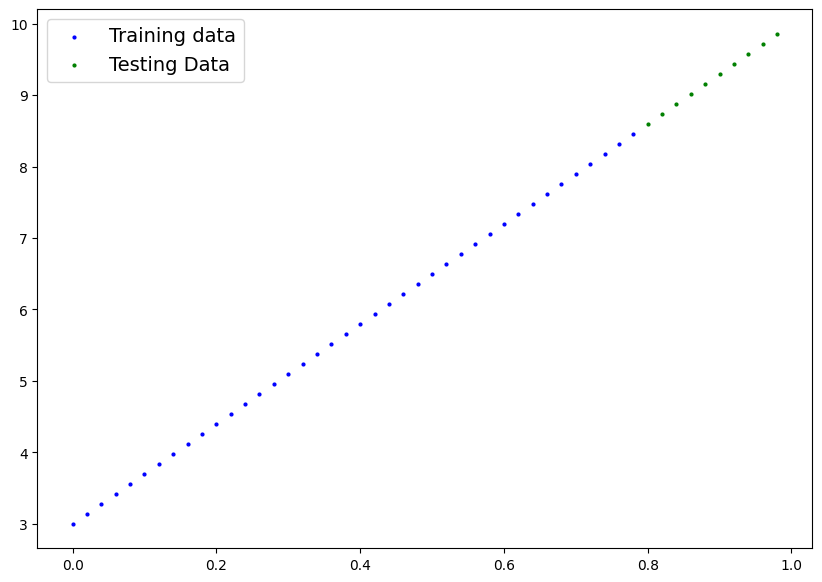

In [18]:
plot_predictions()

## 2. Building model

First PyTorch model

What our model does:
* Start with random values (weight & bias)
* look at training data and adjust the random values to better represent the ideal values (the weigfht & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [19]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): ## <- almost everyhting in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression

### PyTorch model building essentials

* `torch.nn` - Contains all the buildings blocks for computational graphs (a neural network could be considered a computational graph)
* `torch.nn.Parameter` - What parameters should our model try and leanr, often a PyTorch layer from `torch.nn` will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you inherit it you should override `forward()` method
* `torch.optim` - This where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclasses require you to overwrite `forward()`, this method defines what happens

### Checking the contents of our PyTorch model

We can check our model parameters or what is inside our model by using `.parameters()`

In [20]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making poredition using `torch.inference_mode()`

To check our moidel's predictive power, let's see how weel it predicts `y_test` bassed on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method.

In [22]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [23]:
y_test

tensor([[8.6000],
        [8.7400],
        [8.8800],
        [9.0200],
        [9.1600],
        [9.3000],
        [9.4400],
        [9.5800],
        [9.7200],
        [9.8600]])

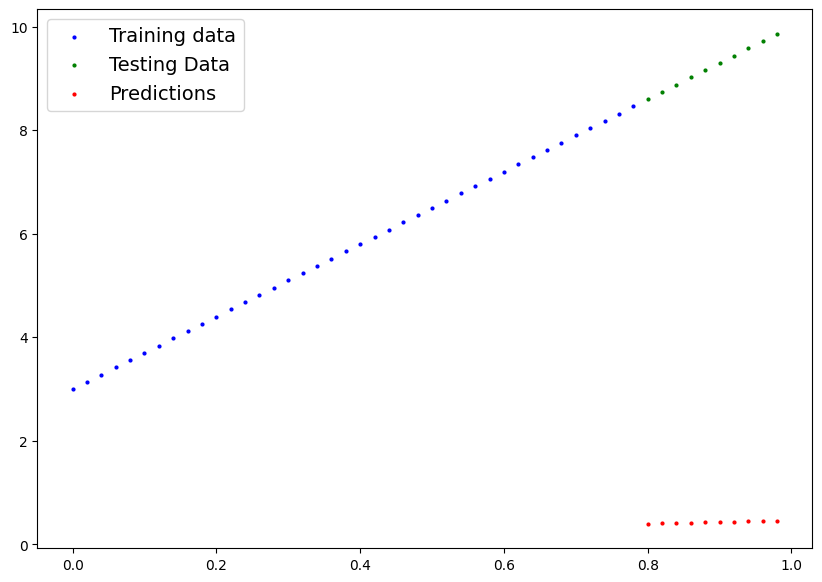

In [24]:
plot_predictions(predictions= y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better represeantation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss functions.

* Note: Loss function may also be called cost function or criterion in different areas.

Things we need to train:
* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve the loss function.
  * Inside the optimizer you'll often have to set two parameters:
      * `params` - the model parameters you'd like to optimize
      * `lr` - the learning rate is a jyperparameter that defines how big/small the optimizer changes the parameters with each step

And specifically for PyTorch we need:
* A training loop
* A testing loop

In [26]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate = possible the most important hyperparameter you can set

### Building a training loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loos backward - move backwards through the network to calculate the gradients of each of the parameters of ouyr model with respect to the loss (**backpropagation**)
5. Optimizer steo - use the optimizer to adjust the models parameters to try and improve the loss (**gradient descent**)

In [ ]:
# An epoch is one loop through the data... (this is a hyperparameter because w've set it )
epochs = 1

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop... we have to zero them above in step 3

  model_0.eval() # turns off gradient tracking